In [1]:
import numpy as np
import pandas as pd
from glob import glob

from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns



### Input data into a dataframe.

In [2]:
#Define a function to collect the image paths and construct a dataframe to work with.
def path_to_df(image_path):
    df = pd.DataFrame({'path':image_path})
    splitted = df['path'].str.split(pat='/')
    df['id'] = splitted.str.get(3)
    df['type'] = splitted.str.get(4)
    df['train_or_test'] = splitted.str.get(2).str.split(pat='_').str.get(1)
    return(df)

In [3]:
image_train_paths = glob('../input/stage1_*/*/*/*')
df_path = path_to_df(image_train_paths)

In [4]:
df_path.head(2)

,path,id,type,train_or_test
0,../input/stage1_test/519dc0d672d1c295fc69b629a...,519dc0d672d1c295fc69b629af8721ccb1a1f136d19766...,images,test
1,../input/stage1_test/44afae184c89e6ba55985b4d3...,44afae184c89e6ba55985b4d341acc1ae1e8b6ef963120...,images,test


### Exploratory analysis to understand the data

In [5]:
#Extract and examine the shape information for the images and masks.
df_path = pd.concat([df_path, pd.DataFrame(columns = ['shape'], dtype='object')])
for i in range(0,len(df_path)):
    im_path = df_path.loc[i,'path']
    im = imread(im_path)
    df_path.at[i,'shape'] = im.shape      

In [6]:
df_path.head(2)

,id,path,shape,train_or_test,type
0,519dc0d672d1c295fc69b629af8721ccb1a1f136d19766...,../input/stage1_test/519dc0d672d1c295fc69b629a...,"(256, 256, 4)",test,images
1,44afae184c89e6ba55985b4d341acc1ae1e8b6ef963120...,../input/stage1_test/44afae184c89e6ba55985b4d3...,"(512, 680, 3)",test,images


In [7]:
#List the shape values for all masks.
df_path[df_path['type']=='masks'].loc[:,'shape'].value_counts()

(520, 696)      9552
(256, 256)      9538
(256, 320)      4682
(360, 360)      2134
(603, 1272)     1377
(1024, 1024)    1345
(512, 640)       411
(260, 347)       408
(1040, 1388)      14
Name: shape, dtype: int64

In [8]:
#List the shape values for all images.
df_path[df_path['type']=='images'].loc[:,'shape'].value_counts()

(256, 256, 4)      354
(256, 320, 4)      112
(520, 696, 4)       96
(360, 360, 4)       91
(512, 640, 4)       21
(1024, 1024, 4)     16
(260, 347, 4)        9
(512, 680, 3)        8
(603, 1272, 4)       6
(519, 253, 3)        4
(256, 256, 3)        4
(524, 348, 3)        4
(520, 348, 3)        4
(519, 162, 3)        2
(519, 161, 3)        2
(1040, 1388, 4)      1
(390, 239, 4)        1
Name: shape, dtype: int64

In [9]:
#Define a function to plot images.
def plot_sample(path_to_plot, plot_type='image'):
    #Determine the numbers of rows and columns of panels.
    n = len(path_to_plot)
    if n <= 10:
        r = 1
        c = n
    else:
        r = (n+9)//10
        c = 10
    
    #Define the panel axes.
    fig, axes = plt.subplots(nrows=r, ncols=c, sharex=False, sharey=False, figsize=(c*2,r*2))
    axes = axes.flat
    #If the number of axes is more than that of panels, delete the extra axes.
    n_to_del = r*c - n
    if n_to_del > 0:
        for d_ax in axes[-n_to_del:]:
            fig.delaxes(d_ax)

    #Plot the data as image or histogram.
    for p,ax in zip(path_to_plot, axes):
        im = imread(p)
        if plot_type == 'image':
            ax.imshow(im)
            ax.axis('off')
            ax.grid('off')
            plt.tight_layout(pad=-1.2)
        elif plot_type == 'histogram':
            sns.distplot(im.flatten(), rug=False, hist=True, bins=25, ax=ax,
                         hist_kws={'edgecolor':'white','linewidth':1},
                         kde_kws={'color':'black','linewidth':2})
            plt.tight_layout(pad=0)
        else:
            print('What is the plot type, image or histogram?')

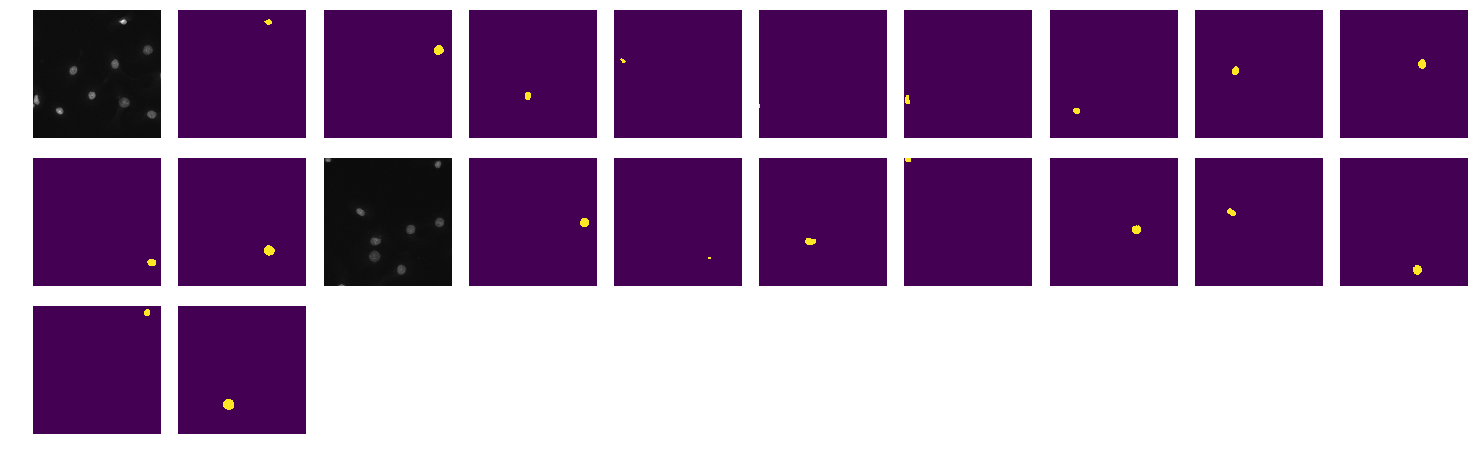

In [10]:
#Plot all images and masks with the same IDs (in the same directories).
s1 = df_path[df_path['id']=='e66a97b2c77f3d66a7d3cebbc6a36c8c6259368a397f7b67647ed80ad53aa776'].loc[:,'path'].tolist()
s2 = df_path[df_path['id']=='0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe'].loc[:,'path'].tolist()
plot_sample(s1+s2,'image')

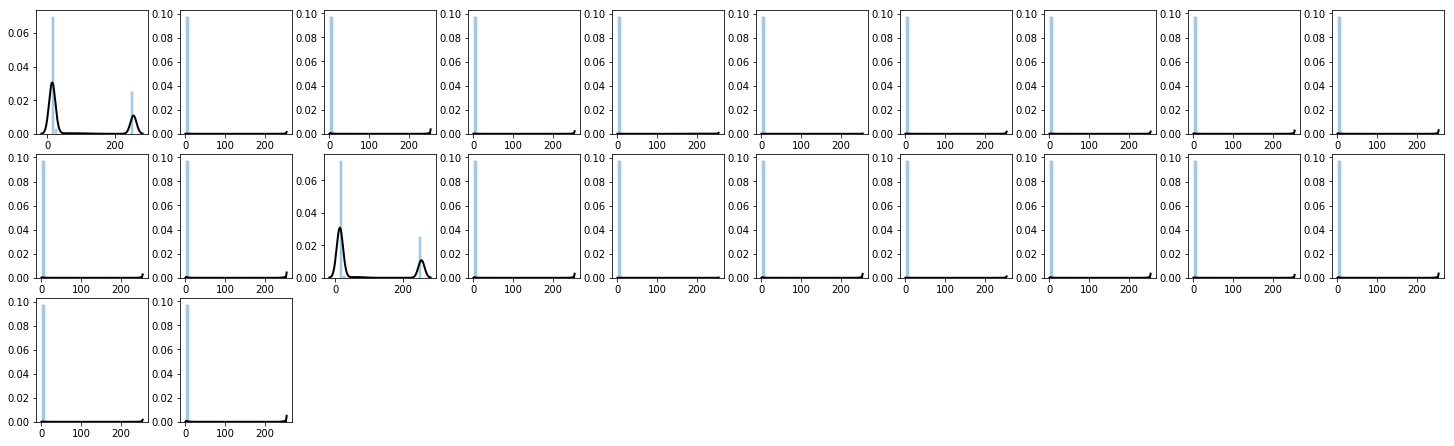

In [11]:
plot_sample(s1+s2,'histogram')

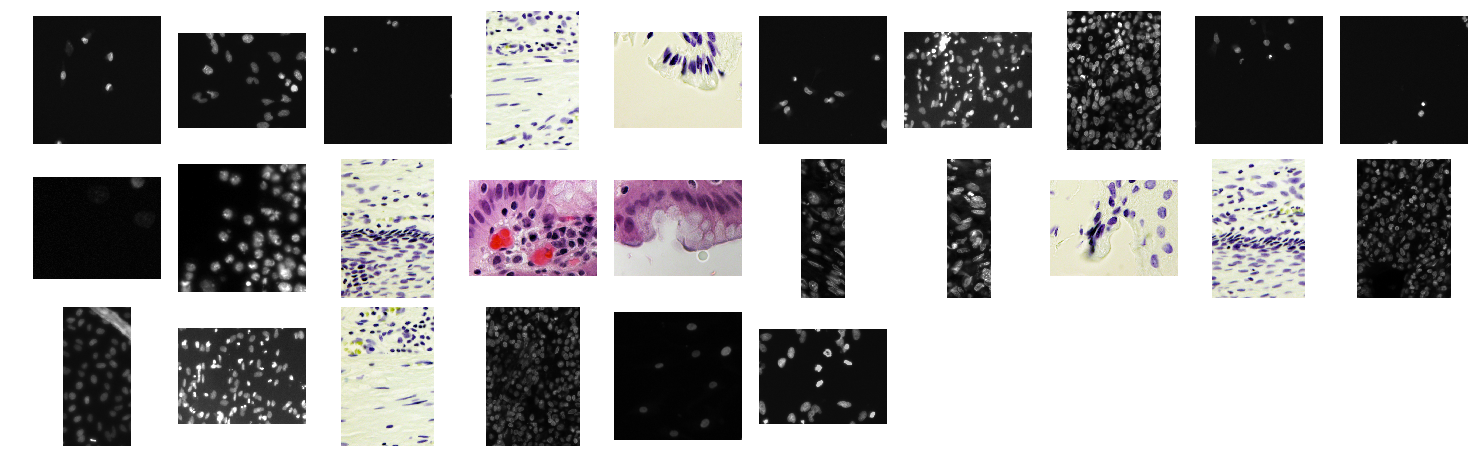

In [12]:
#Plot the original images with different IDs (in different directories).
ori_img_lst = df_path[df_path['type']=='images'].loc[21:46,'path'].tolist()
plot_sample(ori_img_lst,'image')

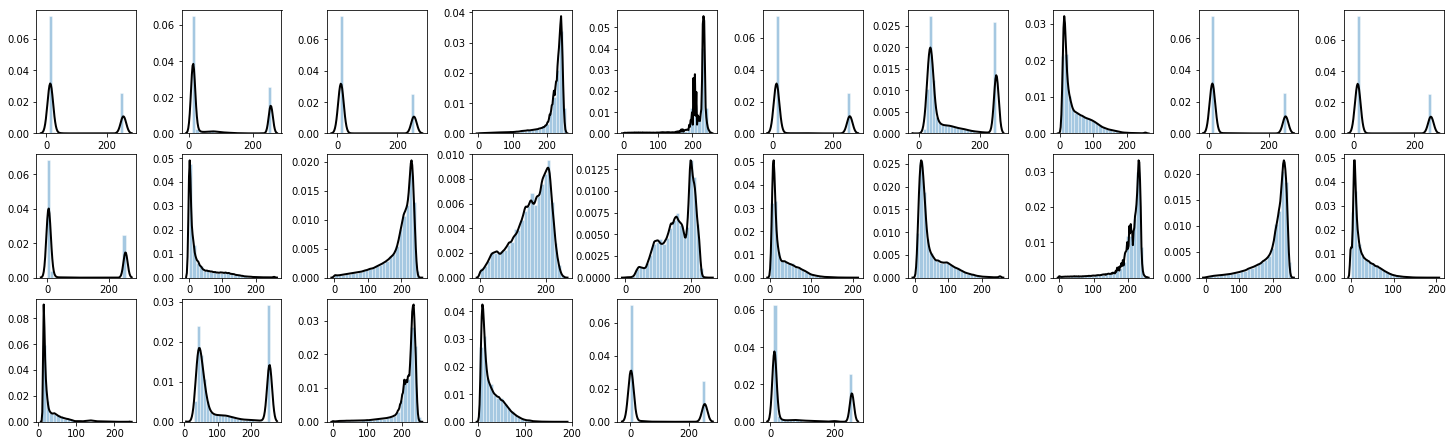

In [13]:
plot_sample(ori_img_lst,'histogram')

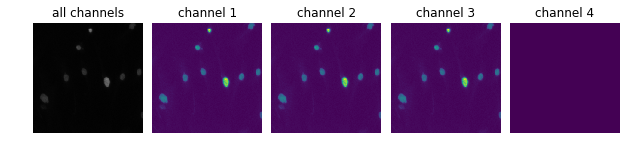

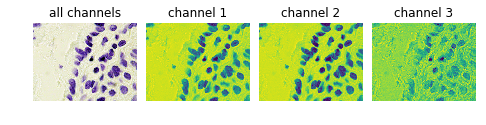

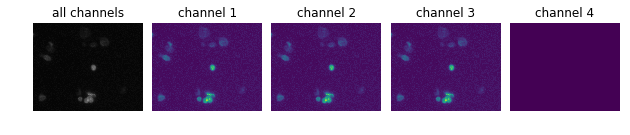

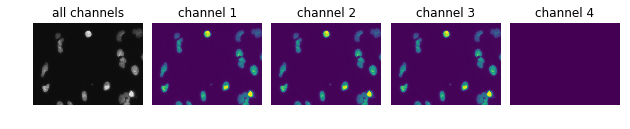

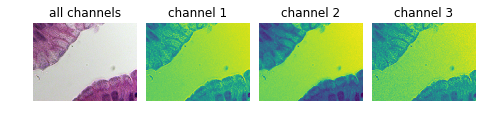

In [14]:
#The original images have either 3 or 4 channels.
#Plot individual channels of the images.
for i in range(0,5):
    df_img = df_path[df_path['type']=='images']
    pa = df_img.loc[i,'path']
    sh = df_img.loc[i,'shape']
    ch = sh[2]

    #Define the panel axes.
    fig, axes = plt.subplots(nrows=1, ncols=ch+1, sharex=False, sharey=False, figsize=(ch*2,2))
    axes = axes.flat

    #Plot the individual channels of the image.
    im = imread(pa)
    for c, ax in zip(range(0,ch+1), axes):
        if c==0:
            ax.imshow(im)
            ax.axis('off')
            ax.grid('off')
            ax.set_title('all channels')
        else:
            ax.imshow(im[:,:,c-1])
            ax.axis('off')
            ax.grid('off')
            ax.set_title('channel '+str(c))
    plt.tight_layout(pad=-2)

### Prepare a dataframe for training

In [15]:
#Define a function to prepare a training or testing dataframe from df_path.
def get_new_df(df=df_path,train_or_test='train'):
    #Create a new dataframe for training or testing data.
    df_new = df[df['train_or_test']==train_or_test].reset_index(drop=True)
    #Reorgnize the dataframe to list the image types as columns and join multiple paths into single strings.
    df_new = pd.pivot_table(df_new, index=['id'], values='path', columns=['type'], aggfunc=lambda x: ','.join(x))
    #Rename the index and columns
    df_new = df_new.reset_index()
    df_new.columns.name = None
    #Convert the path strings to lists.
    df_new['masks'] = df_new['masks'].str.split(',')
    df_new['images'] = df_new['images'].str.split(',')    
    #Create two new columns to store image and mask arrays.
    df_new = pd.concat([df_new, pd.DataFrame(columns = ['image_arr','mask_arr'], dtype='object')])
    #Read the images and masks, 
    #convert the multi-channel images to grayscale,
    #rescale them to [0,1], 
    #and finally, store the arrays into the new columns.
    for r in range(0,len(df_new)):
        image_path = df_new.at[r,'images'] 
        mask_path = df_new.at[r,'masks']

        image_array = np.sum(np.sum(np.array([imread(img) for img in image_path]),axis=0),axis=2)
        image_array_scaled = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))
        df_new.at[r,'image_arr'] = image_array_scaled

        mask_array = np.sum(np.array([imread(msk) for msk in mask_path]),axis=0)
        mask_array_scaled = (mask_array - np.min(mask_array)) / (np.max(mask_array) - np.min(mask_array))
        df_new.at[r,'mask_arr'] = mask_array_scaled
    #Return the new dataframe.
    return(df_new)

In [16]:
df_train = get_new_df(train_or_test='train')

In [17]:
len(df_train)

670

In [18]:
df_train.head(2)

,id,image_arr,images,mask_arr,masks
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,"[[0.0373831775701, 0.0373831775701, 0.03738317...",[../input/stage1_train/00071198d059ba7f5914a52...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[../input/stage1_train/00071198d059ba7f5914a52...
1,003cee89357d9fe13516167fd67b609a164651b2193458...,"[[0.0157480314961, 0.0157480314961, 0.01574803...",[../input/stage1_train/003cee89357d9fe13516167...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[../input/stage1_train/003cee89357d9fe13516167...
